In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/Superstore_data.csv', encoding='latin1')

In [34]:
#Setup for the viewing tables
desired_width = 10000
pd.set_option('display.width', desired_width)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
np.set_printoptions(linewidth=desired_width)

#EDA

In [35]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [37]:
df.describe().round(2)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


In [38]:
categorical_col = df.select_dtypes(include=['object']).columns
df[categorical_col].describe()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [39]:
null_rows = df[df.isnull().any(axis=1)]
print("Number of empty rows:", null_rows.shape[0])

Number of empty rows: 0


In [40]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


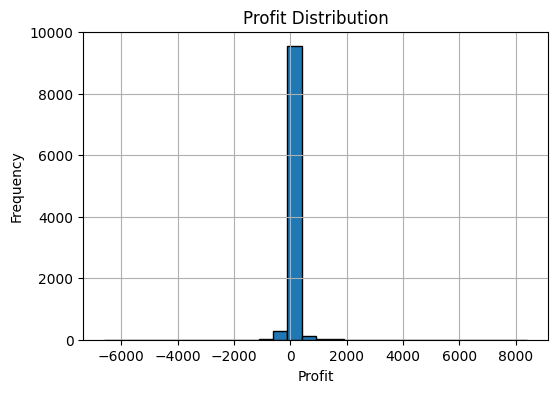

In [41]:
plt.figure(figsize=(6, 4))
df['Profit'].hist(bins=30, edgecolor='black')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

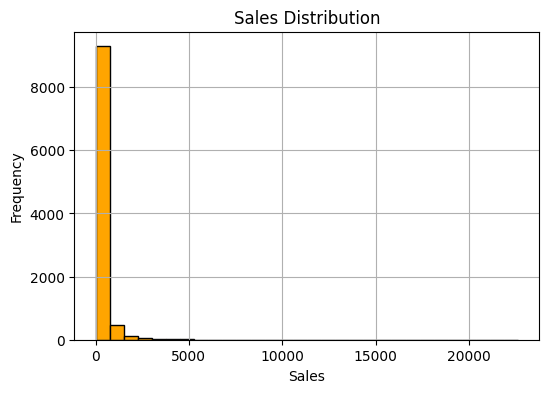

In [42]:
plt.figure(figsize=(6, 4))
df['Sales'].hist(bins=30, edgecolor='black', color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

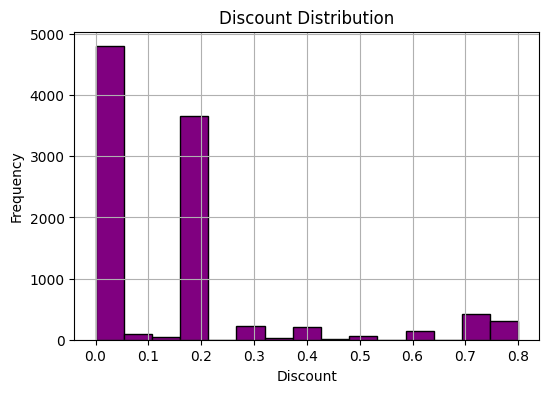

In [43]:
plt.figure(figsize=(6, 4))
df['Discount'].hist(bins=15, edgecolor='black', color='purple')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

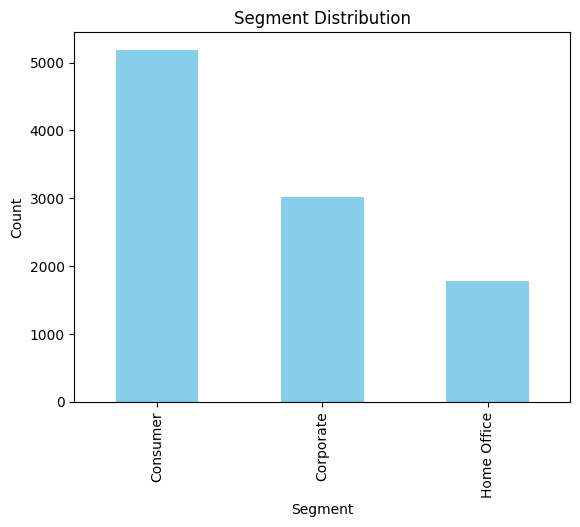

In [44]:
df['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

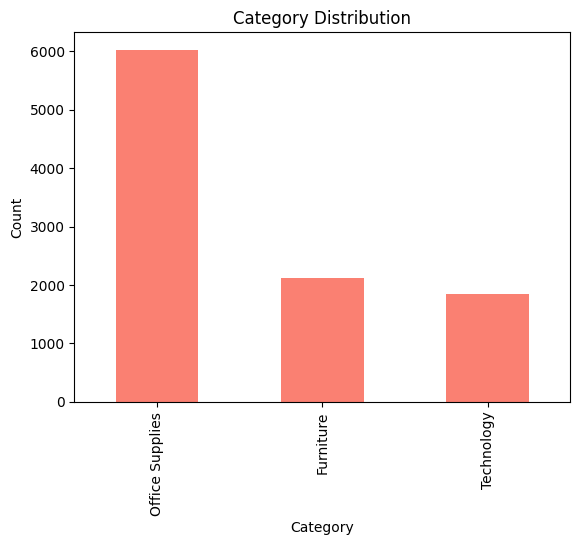

In [45]:
df['Category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

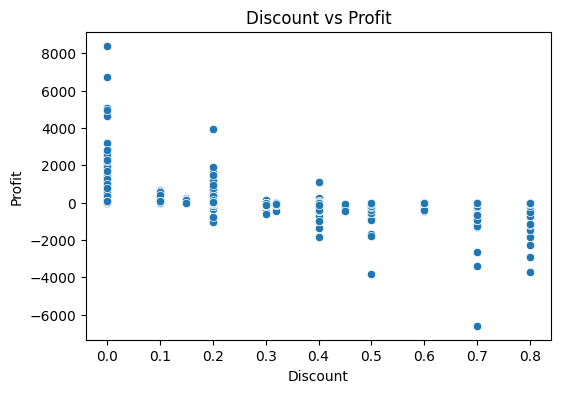

In [46]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

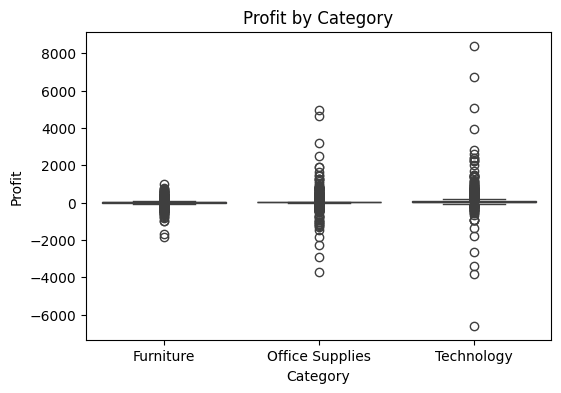

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit by Category')
plt.show()

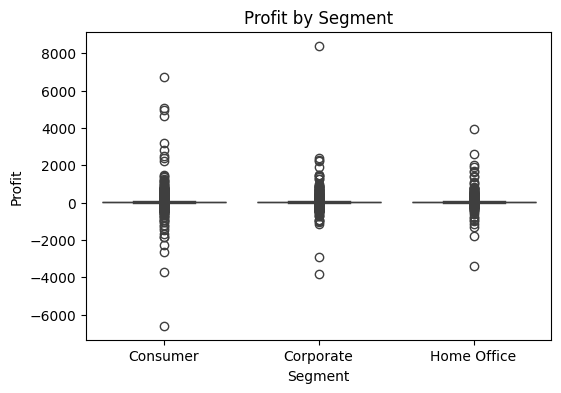

In [48]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title('Profit by Segment')
plt.show()


/tmp/ipython-input-49-721177820.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum,  ci=None)


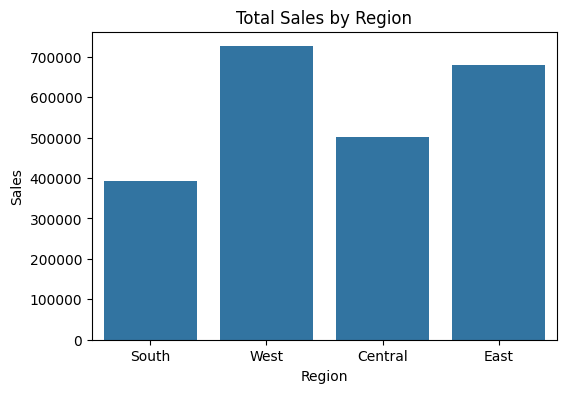

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum,  ci=None)
plt.title('Total Sales by Region')
plt.show()

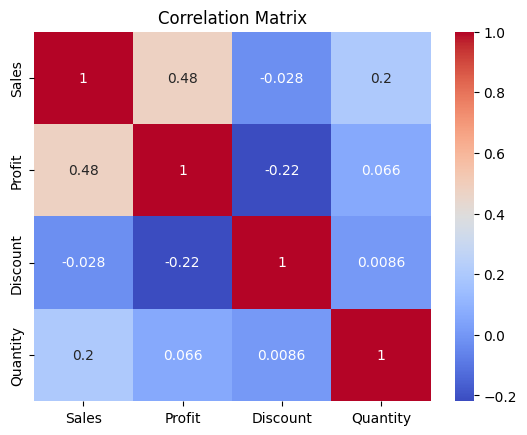

In [50]:
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Data Processing

In [51]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#Analysis

##Are highly discounted product causing profit loss?

In [52]:
subcats_loss = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcats_loss = subcats_loss[subcats_loss < 0]
print(subcats_loss)

Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Name: Profit, dtype: float64


In [53]:
avg_discount = df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)
print(avg_discount.loc[subcats_loss.index])

Sub-Category
Tables       0.261285
Bookcases    0.211140
Supplies     0.076842
Name: Discount, dtype: float64


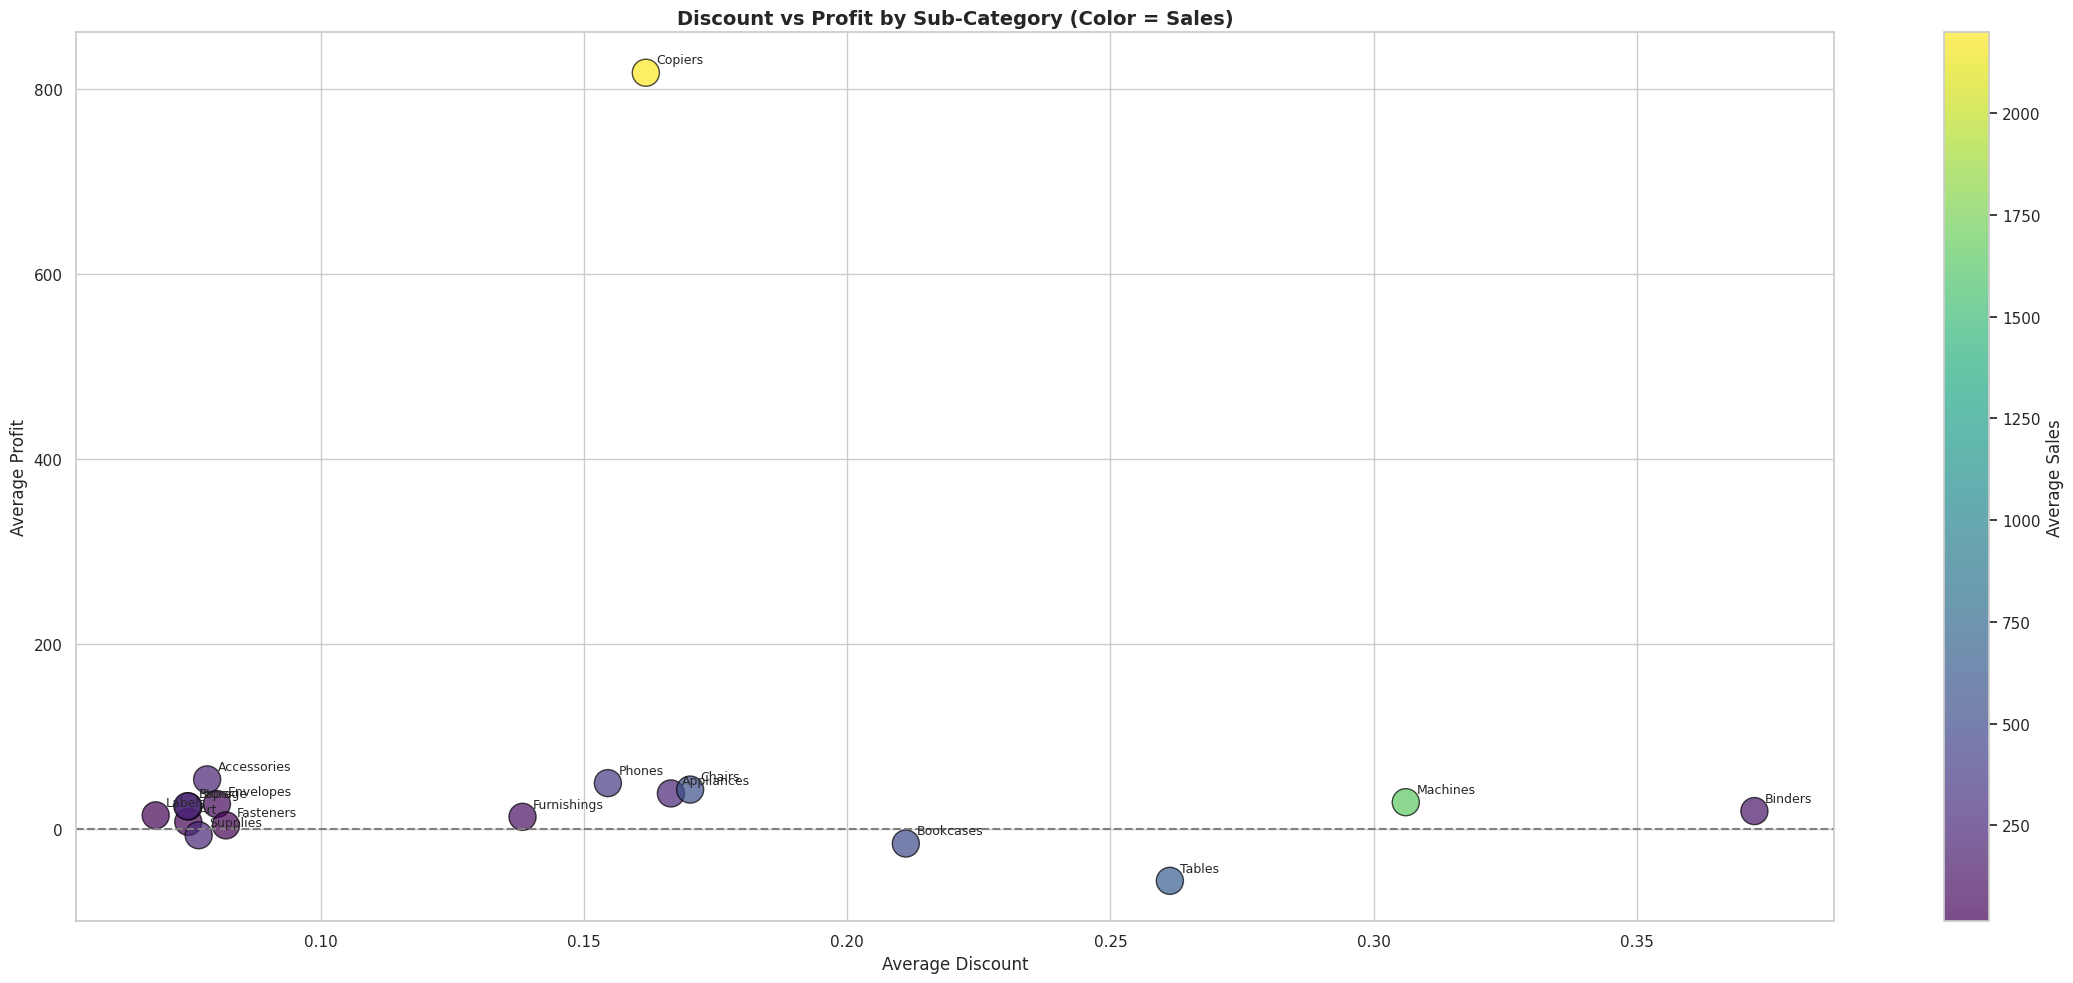

In [54]:
subcat_group = df.groupby('Sub-Category')[['Profit', 'Discount','Sales']].mean()

plt.figure(figsize=(23, 10))
sns.set(style="whitegrid")

scatter = plt.scatter(
    x=subcat_group['Discount'],
    y=subcat_group['Profit'],
    c=subcat_group['Sales'],
    cmap='viridis',
    s=380,
    alpha=0.7,
    edgecolors='black'
)


for i in subcat_group.index:
    plt.text(subcat_group.loc[i, 'Discount'] + 0.002,
             subcat_group.loc[i, 'Profit'] + 10,
             i, fontsize=9)

cbar = plt.colorbar(scatter)
cbar.set_label('Average Sales')

plt.axhline(0, color='gray', linestyle='--')
plt.title("Discount vs Profit by Sub-Category (Color = Sales)", fontsize=14, weight='bold')
plt.xlabel("Average Discount", fontsize=12)
plt.ylabel("Average Profit", fontsize=12)
plt.tight_layout()
plt.show()


###What if discount is reduced by 10%?


In [55]:
X = df[['Discount']]
y = df['Profit']
model = LinearRegression()
model.fit(X, y)

df['Profit_Forecast'] = model.predict(df[['Discount']] * 0.9)

In [56]:
avg_actual = df['Profit'].mean().round(2)
avg_forecast = df['Profit_Forecast'].mean().round(2)

print("Original average profit:", avg_actual)
print("Forecasted average profit (with 10% lower discount):", avg_forecast)

Original average profit: 28.66
Forecasted average profit (with 10% lower discount): 32.55


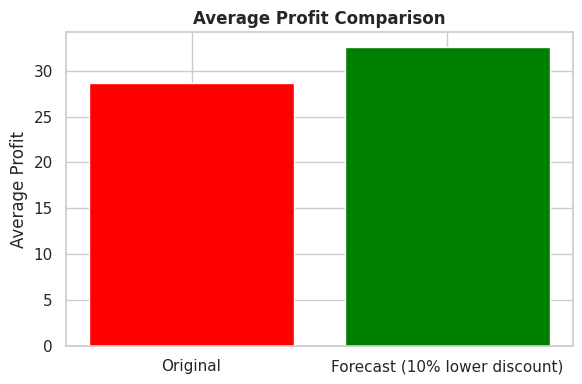

In [57]:
plt.figure(figsize=(6, 4))
plt.bar(['Original', 'Forecast (10% lower discount)'], [avg_actual, avg_forecast], color=['red', 'green'])
plt.ylabel('Average Profit')
plt.title('Average Profit Comparison', weight='bold')
plt.tight_layout()
plt.show()

##What customer segment has the most profit per order?



In [58]:
segment_group = df.groupby('Segment').agg({
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
})

segment_group['Profit_per_Order'] = segment_group['Profit'] / segment_group['Order ID']
segment_group = segment_group.sort_values(by='Profit_per_Order', ascending=False)

print(segment_group.round(2))

                Profit  Order ID  Profit_per_Order
Segment                                           
Home Office   60298.68       909             66.34
Corporate     91979.13      1514             60.75
Consumer     134119.21      2586             51.86


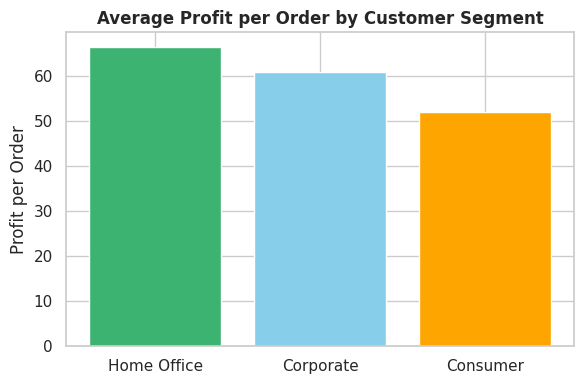

In [59]:
plt.figure(figsize=(6, 4))
plt.bar(segment_group.index, segment_group['Profit_per_Order'], color=['mediumseagreen', 'skyblue', 'orange'])
plt.title("Average Profit per Order by Customer Segment", fontweight='bold')
plt.ylabel("Profit per Order")
plt.tight_layout()
plt.show()

##Which states are high risk? (high in sales but low or negative in profit)

In [60]:
geo_group = df.groupby('State')[['Sales', 'Profit']].sum()

high_sales = geo_group['Sales'] > geo_group['Sales'].quantile(0.75)
low_profit = geo_group['Profit'] < geo_group['Profit'].quantile(0.25)
high_risk_states = geo_group[high_sales & low_profit].sort_values(by='Profit')
print(high_risk_states)


                      Sales      Profit
State                                  
Texas           170188.0458 -25729.3563
Ohio             78258.1360 -16971.3766
Pennsylvania    116511.9140 -15559.9603
Illinois         80166.1010 -12607.8870
North Carolina   55603.1640  -7490.9122
Florida          89473.7080  -3399.3017


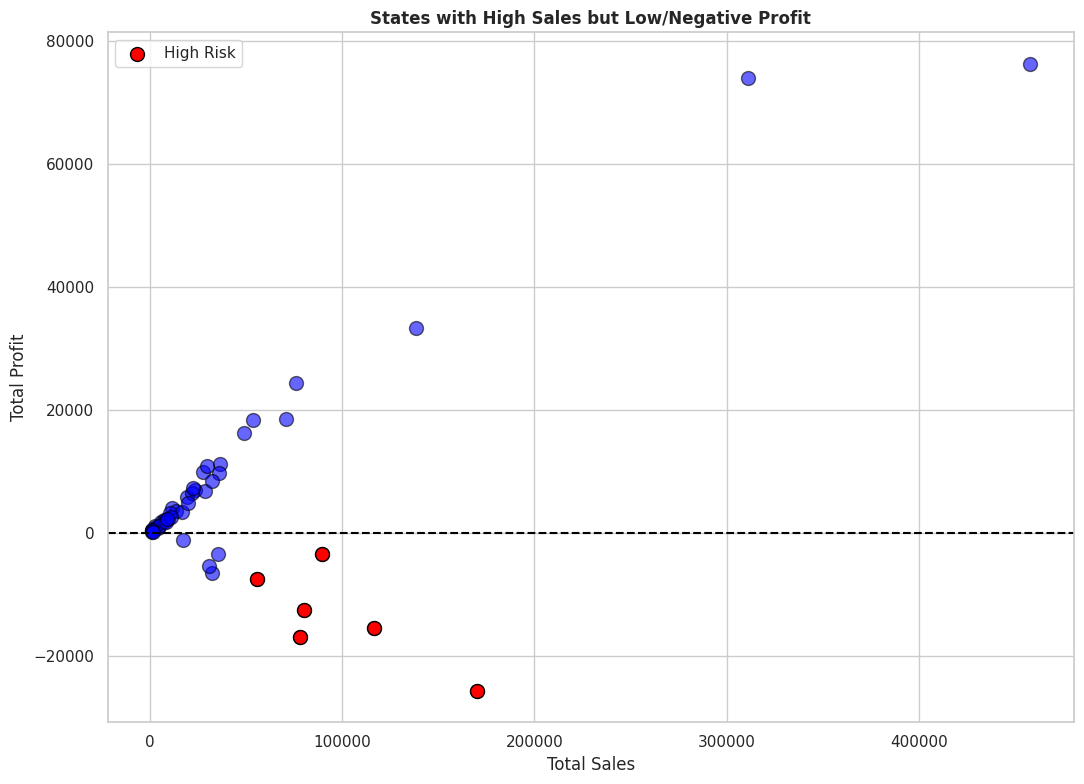

In [61]:
plt.figure(figsize=(11, 8))
plt.scatter(geo_group['Sales'], geo_group['Profit'], s=100, color='blue', alpha=0.6, edgecolors='black')
plt.scatter(high_risk_states['Sales'], high_risk_states['Profit'], s=100, color='red', edgecolors='black', label='High Risk')
plt.axhline(0, color='black', linestyle='--')
plt.title("States with High Sales but Low/Negative Profit", fontweight='bold')
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.legend()
plt.tight_layout()
plt.show()

###In depth analysis on Profit Margin for High Risk states

In [62]:
high_risk = df[df['State'].isin(high_risk_states.index)]

df_risk = high_risk.groupby('Sub-Category')[['Sales', 'Profit']].mean()
df_risk['Profit_Margin'] = (df_risk['Profit'] / df_risk['Sales']) * 100


print(df_risk.sort_values(by='Sales', ascending=False).round(2))

                Sales  Profit  Profit_Margin
Sub-Category                                
Machines      1665.33 -550.97         -33.08
Copiers       1470.45  293.66          19.97
Tables         528.88 -178.30         -33.71
Chairs         446.27  -35.28          -7.90
Bookcases      442.25 -110.70         -25.03
Phones         355.43    2.52           0.71
Supplies       228.51  -44.69         -19.56
Storage        212.88  -11.76          -5.52
Accessories    168.37   24.24          14.40
Appliances     138.85  -44.69         -32.18
Furnishings     75.22  -14.65         -19.48
Envelopes       64.49   21.74          33.71
Binders         55.26  -64.40        -116.53
Paper           48.04   16.58          34.51
Art             27.30    3.53          12.91
Labels          20.60    7.05          34.22
Fasteners       12.82    3.43          26.72


In [63]:
low_risk = df[~df['State'].isin(high_risk_states.index)]

df_nrisk = low_risk.groupby('Sub-Category')[['Sales', 'Profit']].mean()
df_nrisk['Profit_Margin'] = (df_nrisk['Profit'] / df_nrisk['Sales']) * 100


print(df_nrisk.sort_values(by='Sales', ascending=False).round(2))

                Sales   Profit  Profit_Margin
Sub-Category                                 
Copiers       2524.44  1052.15          41.68
Machines      1633.74   376.06          23.02
Tables         704.35     1.30           0.18
Chairs         570.05    77.44          13.58
Bookcases      529.50    24.50           4.63
Phones         378.93    73.34          19.35
Storage        287.15    41.26          14.37
Appliances     273.53    77.84          28.46
Supplies       253.18    10.63           4.20
Accessories    238.38    68.17          28.60
Binders        172.63    61.88          35.85
Furnishings    105.89    27.46          25.94
Envelopes       65.05    30.17          46.38
Paper           61.32    28.47          46.43
Labels          39.93    18.60          46.58
Art             37.03    10.24          27.66
Fasteners       14.51     4.87          33.54


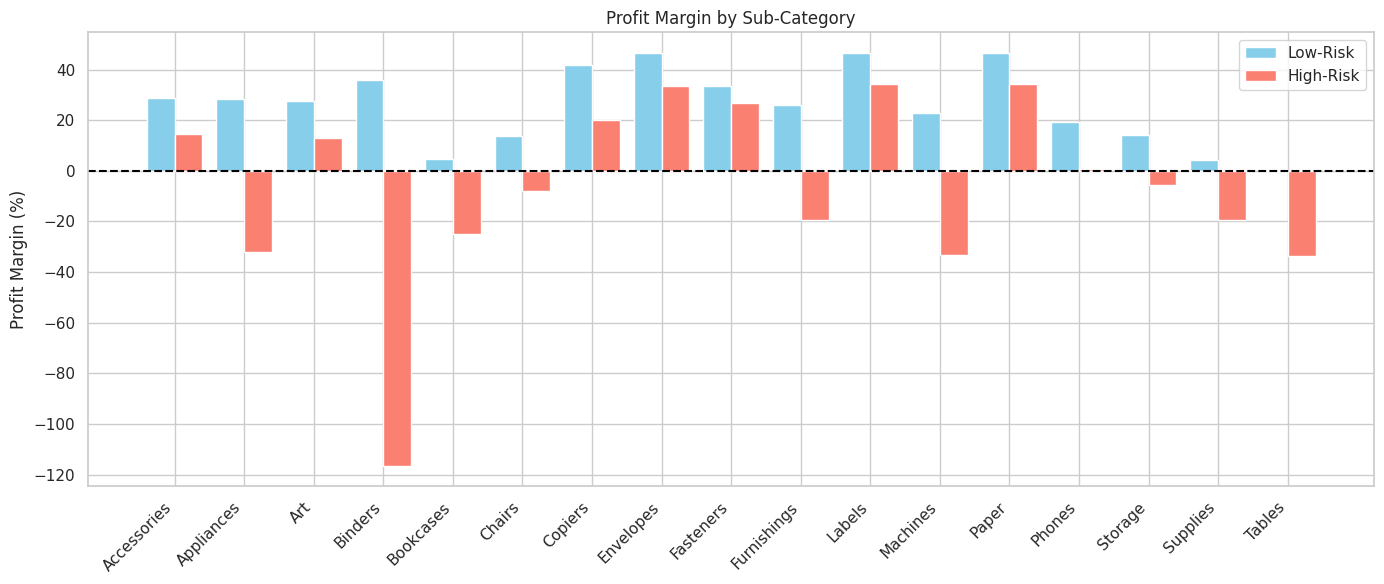

In [64]:
subcats = sorted(df_risk.index)
df_risk = df_risk.loc[subcats]
df_nrisk = df_nrisk.loc[subcats]

x = np.arange(len(subcats))
bar_width = 0.4

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width/2, df_nrisk['Profit_Margin'], width=bar_width, label='Low-Risk', color='skyblue')
plt.bar(x + bar_width/2, df_risk['Profit_Margin'], width=bar_width, label='High-Risk', color='salmon')
plt.xticks(x, subcats, rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Sub-Category')
plt.legend()
plt.tight_layout()
plt.show()